<a href="https://colab.research.google.com/github/Rizwanali324/Deep_Learning_for_CV/blob/main/Perceptrons_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptrons are the simplest form of artificial neural networks and serve as the building blocks for more complex neural network architectures. They were introduced by Frank Rosenblatt in 1957. A perceptron takes multiple binary inputs and produces a single binary output. Each input is associated with a weight, and the perceptron computes a weighted sum of its inputs. If this sum is above a certain threshold, the perceptron outputs 1; otherwise, it outputs 0.

Mathematically, the output (y) of a perceptron with n binary inputs (x1, x2, ..., xn) and corresponding weights (w1, w2, ..., wn) can be expressed as follows:

\[ y = \begin{cases} 1, & \text{if } \sum_{i=1}^{n} w_i x_i \geq \text{threshold} \\ 0, & \text{otherwise} \end{cases} \]

The threshold is a parameter that determines the sensitivity of the perceptron. In geometric terms, the perceptron performs a weighted summation of its inputs and compares it to the threshold to make a decision.

Perceptrons have limitations, such as their inability to learn certain types of patterns or solve non-linear problems. However, by combining multiple perceptrons in layers and introducing activation functions, more complex neural network architectures like multi-layer perceptrons (MLPs) have been developed to address these limitations and handle a broader range of tasks, including pattern recognition and machine learning.

In [2]:
# prompt: write a code to mount the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [43]:
# prompt: write a cod to read this datast /content/drive/MyDrive/Datasets/dataset/datasets/Loan_Default.csv

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/dataset/datasets/Job_Placement_Data.csv')
df.sample(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
34,M,62.0,Others,51.0,Others,Science,52.0,Others,No,68.44,Mkt&HR,62.77,Not Placed
178,M,68.0,Others,56.0,Others,Science,68.0,Sci&Tech,No,73.00,Mkt&HR,68.07,Placed
91,M,52.0,Central,57.0,Central,Commerce,50.8,Comm&Mgmt,No,67.00,Mkt&HR,62.79,Not Placed
77,M,64.0,Others,80.0,Others,Science,65.0,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed
45,F,76.0,Central,64.0,Central,Science,72.0,Sci&Tech,No,58.00,Mkt&HR,66.53,Not Placed


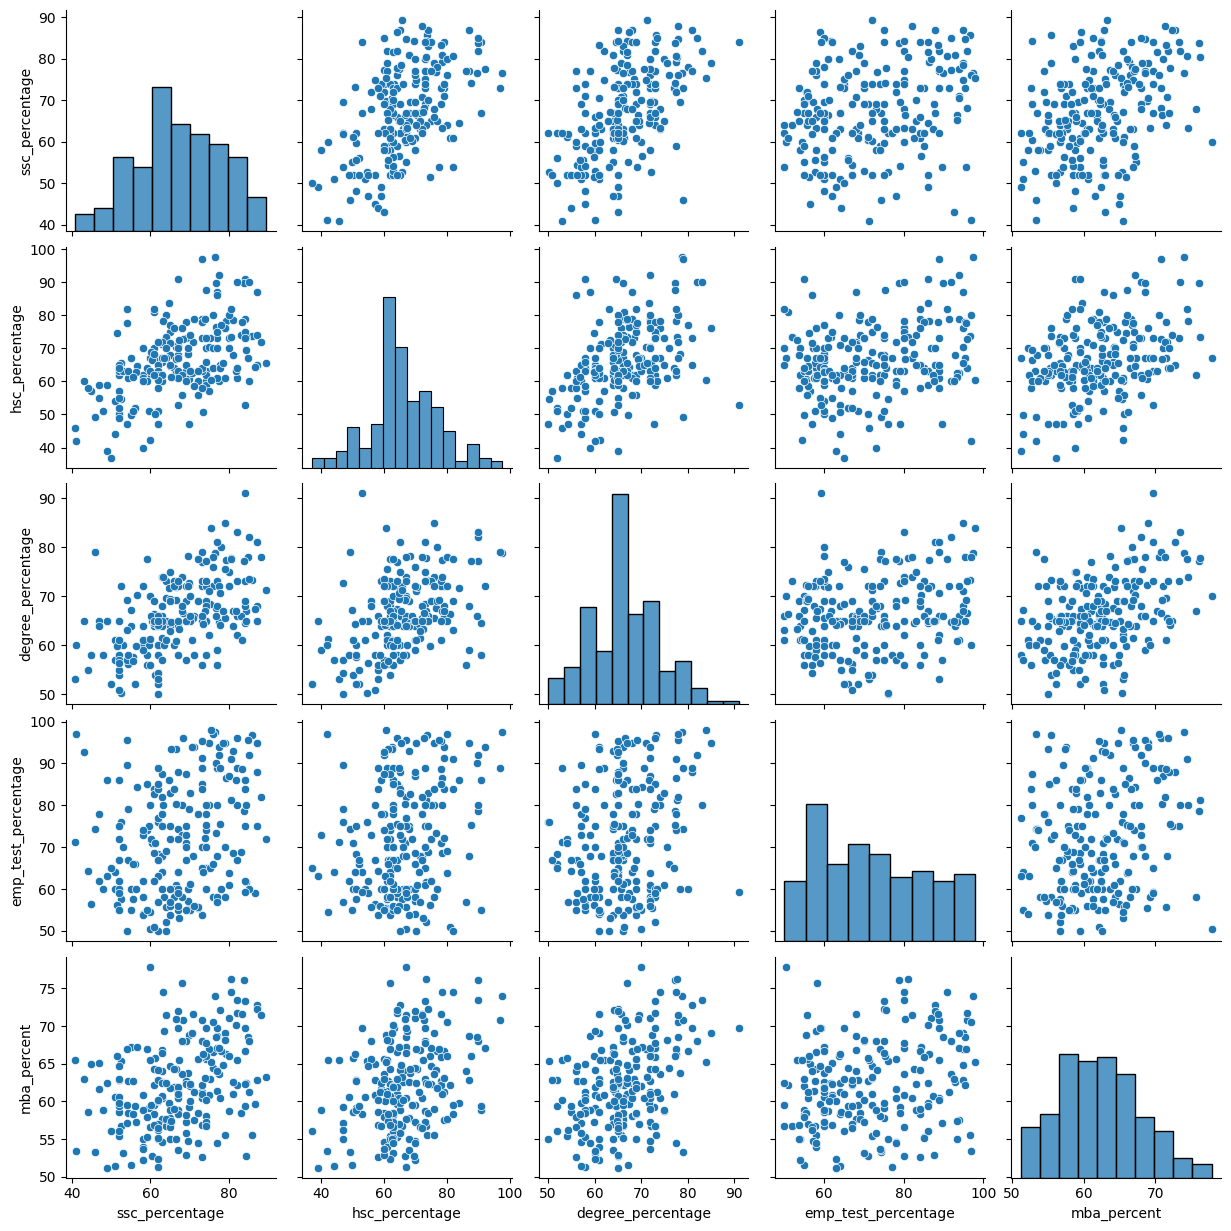

In [46]:
# prompt: genrate  pairplot

from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df)


In [48]:
df.keys()

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [50]:
# prompt: write a code to make new data from these columns [Gender,loan_purpose,loan_amount,income,'credit_type', 'Credit_Score,'age',status]',

# Create a new dataframe containing the specified columns
df = df[['gender', 'ssc_percentage','hsc_percentage',
       'hsc_subject', 'degree_percentage',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status']]

# Print the new dataframe
df.sample(5)


,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status
185,F,88.00,72.00,Science,78.00,No,82.0,Mkt&HR,71.43,Placed
117,M,77.00,75.00,Science,73.00,No,80.0,Mkt&Fin,67.05,Placed
49,F,50.00,37.00,Arts,52.00,No,65.0,Mkt&HR,56.11,Not Placed
90,F,85.00,90.00,Commerce,82.00,No,92.0,Mkt&Fin,68.03,Placed
143,M,77.67,64.89,Commerce,70.67,No,89.0,Mkt&Fin,60.39,Placed


In [51]:
df.isnull().sum()

gender                 0
ssc_percentage         0
hsc_percentage         0
hsc_subject            0
degree_percentage      0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   hsc_percentage       215 non-null    float64
 3   hsc_subject          215 non-null    object 
 4   degree_percentage    215 non-null    float64
 5   work_experience      215 non-null    object 
 6   emp_test_percentage  215 non-null    float64
 7   specialisation       215 non-null    object 
 8   mba_percent          215 non-null    float64
 9   status               215 non-null    object 
dtypes: float64(5), object(5)
memory usage: 16.9+ KB


In [53]:
# prompt: write a code to map the status column

df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})


<ipython-input-53-c75dc91f34d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})


In [54]:
df.sample(6)

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status
153,M,49.0,59.0,Science,65.0,Yes,86.00,Mkt&Fin,62.48,1
7,M,82.0,64.0,Science,66.0,Yes,67.00,Mkt&Fin,62.14,1
206,M,41.0,42.0,Science,60.0,No,97.00,Mkt&Fin,53.39,0
53,M,80.0,70.0,Science,72.0,No,87.00,Mkt&HR,71.04,1
30,F,64.0,73.5,Commerce,73.0,No,52.00,Mkt&HR,56.70,1
19,M,60.0,67.0,Arts,70.0,Yes,50.48,Mkt&Fin,77.89,1


In [58]:
# prompt: write a code to get dummies of dataframe and drop firs

df= pd.get_dummies(df, drop_first=True)
df.sample(5)


,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status,gender_M,hsc_subject_Commerce,hsc_subject_Science,work_experience_Yes,specialisation_Mkt&HR
106,61.08,50.0,54.0,71.0,65.69,0,1,0,1,0,0
42,49.00,39.0,65.0,63.0,51.21,0,1,0,1,0,0
138,82.00,64.0,73.0,96.0,71.77,1,0,0,1,1,0
55,60.40,66.6,65.0,71.0,52.71,1,1,0,1,0,1
47,63.00,60.0,57.0,78.0,54.55,1,1,1,0,1,0


<Figure size 1200x1000 with 0 Axes>

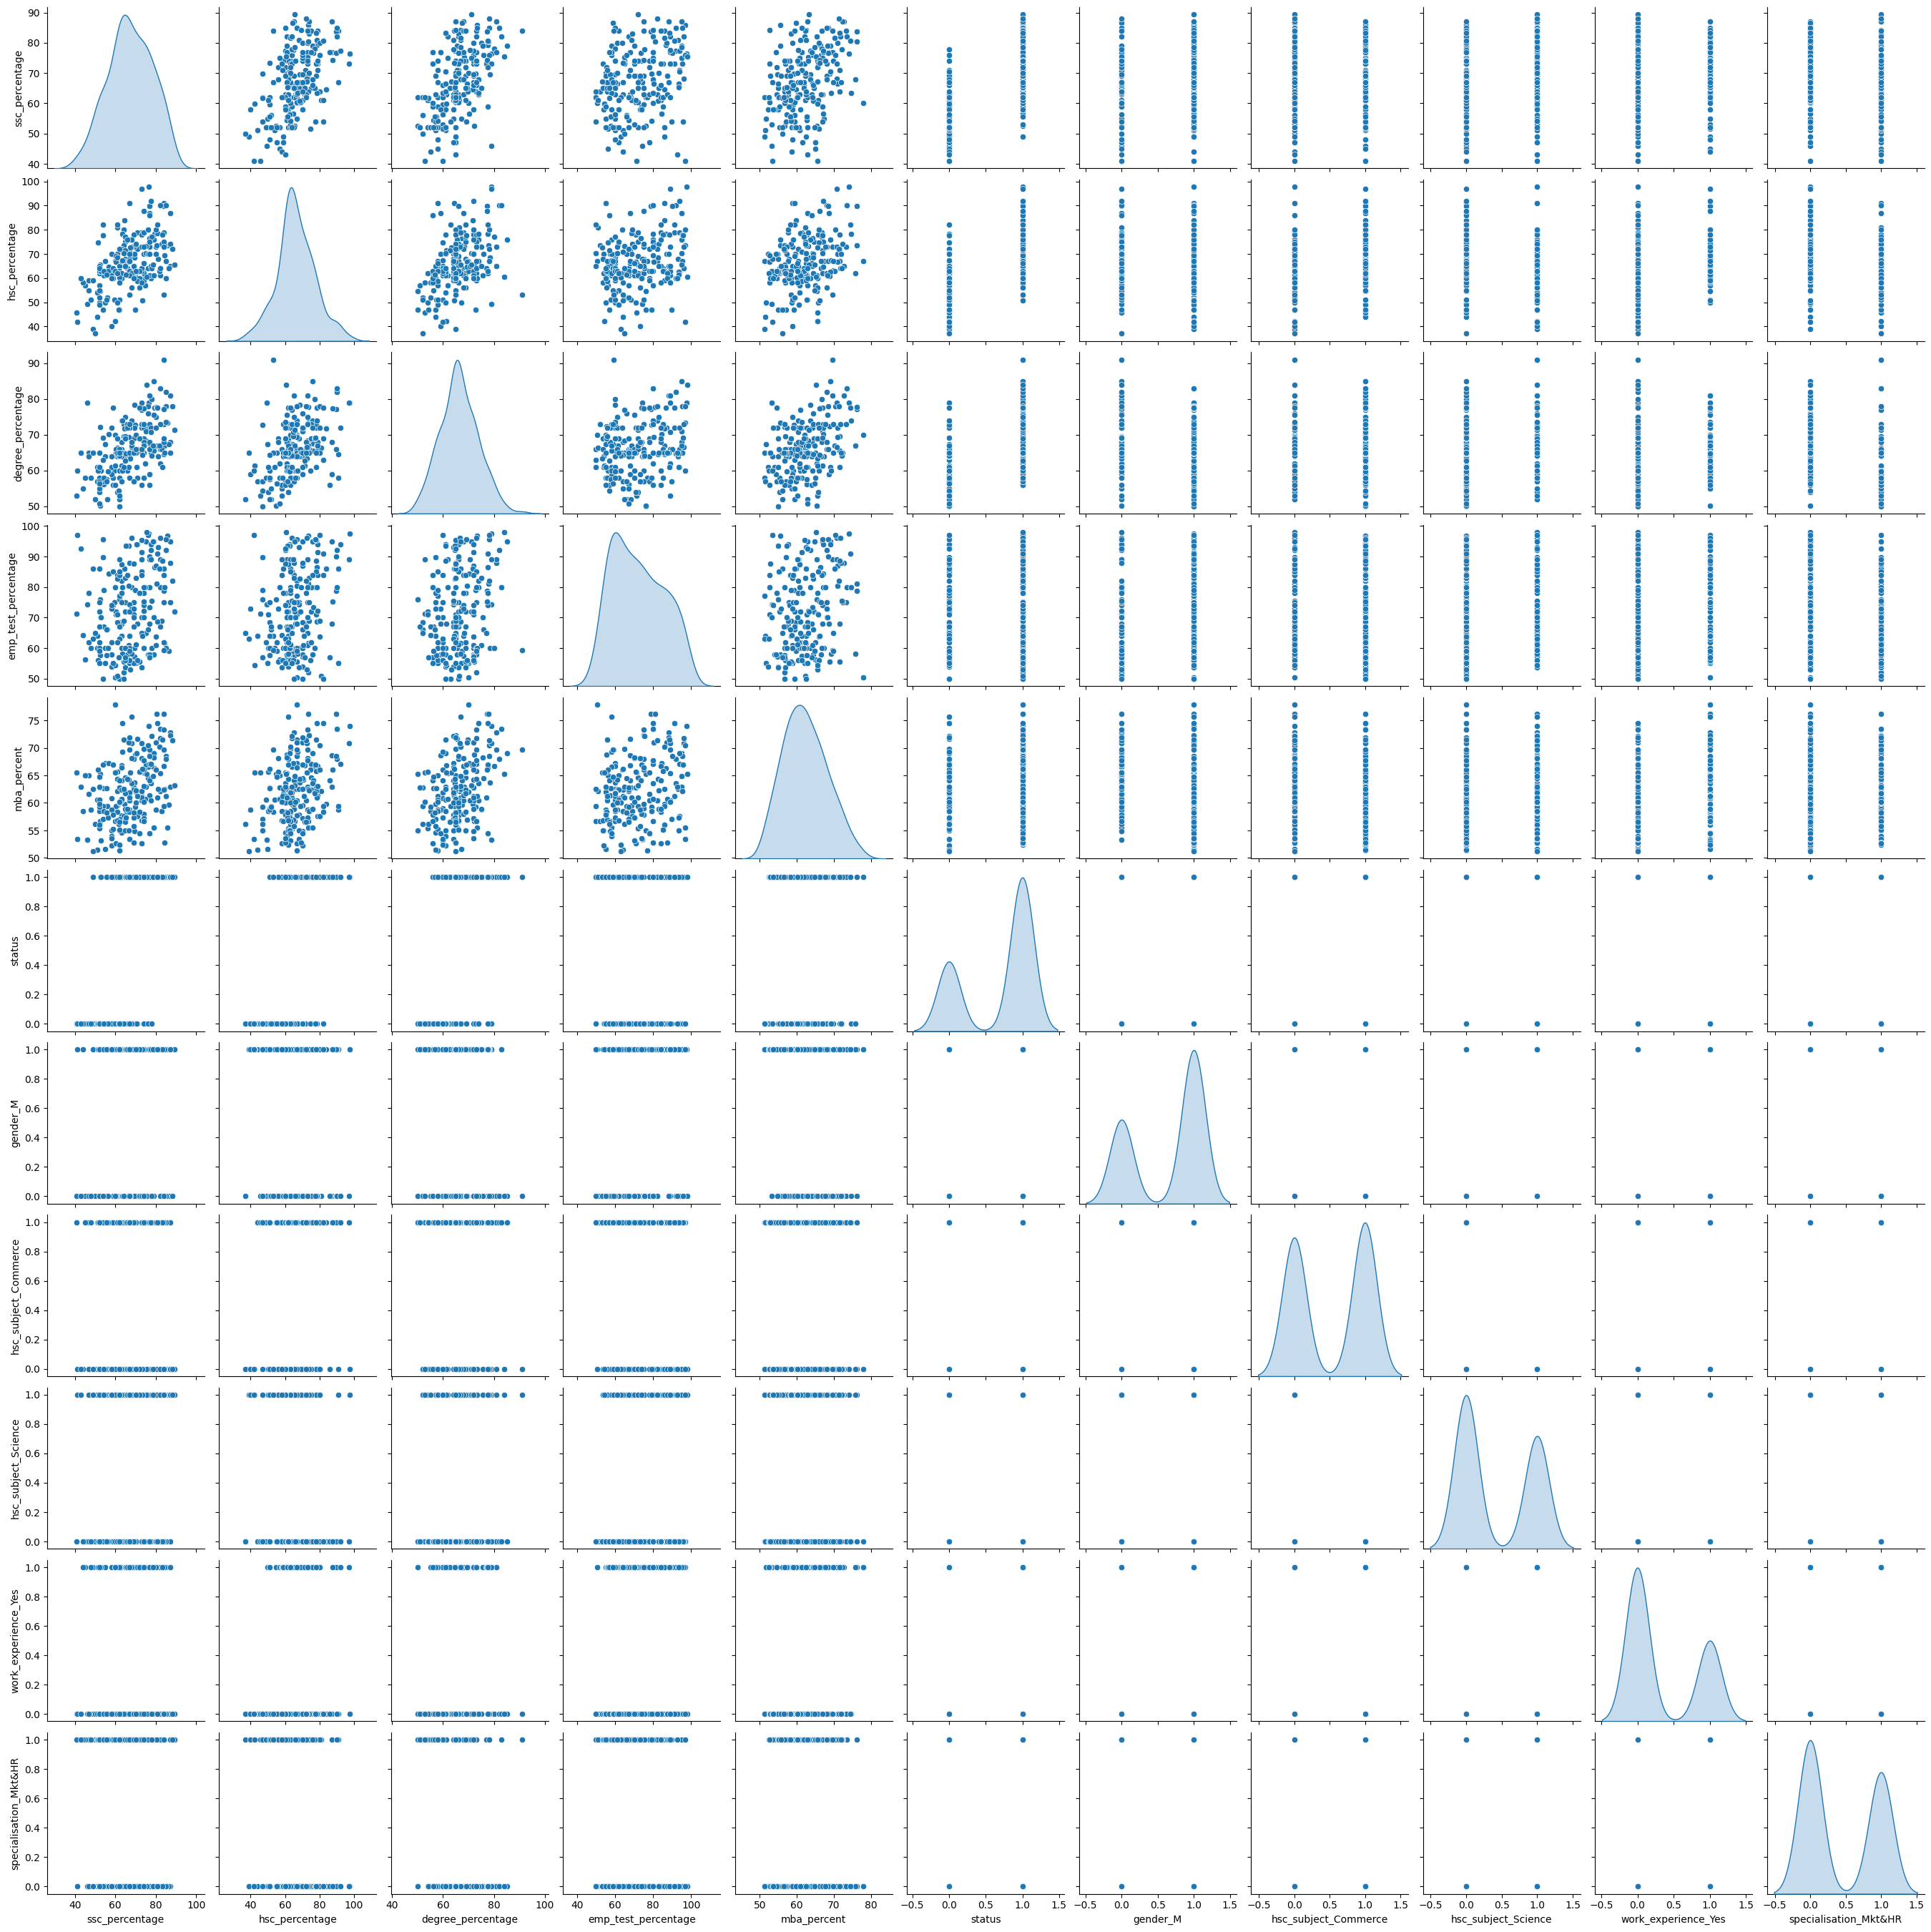

In [59]:
# prompt: plot the pair plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.pairplot(df, diag_kind='kde')
plt.show()


In [61]:
# prompt: writea a code to apply perceptron on this data as s

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('status', axis=1), df['status'], test_size=0.25, random_state=42)

# Create a perceptron model
model = Perceptron()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9074074074074074


In [64]:
# prompt:  coeff

model.coef_


array([[  933.12,   553.72,   132.98,  -272.96, -1314.28,    -7.  ,
          -27.  ,   -22.  ,   104.  ,  -146.  ]])

In [65]:
# prompt: intercept

model.intercept_


array([-39.])

In [154]:
y_test.iloc[3]

1

In [153]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])